In [9]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\царь\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [6]:
# %pwd  #look at the current work dir
# %cd   #change to the dir you want 

%pwd # Вспоминаем, где рабочая область, чтобы закинуть файлик с датасетом

'C:\\Users\\Царь'

In [11]:
#Импортируем все библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

#загрузим данный датасет в виде датафрейма
df = pd.read_csv('ad.csv')

#посмотрим примерные значения и структуру полученного датафрейма
df.head()

,ad_id,action
0,B,1
1,B,1
2,A,0
3,B,0
4,A,1


<AxesSubplot:xlabel='action', ylabel='Count'>

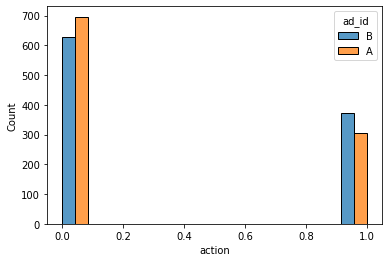

In [12]:
#построим гистрограмму входных данных - как распределены значения
sns.histplot(data=df, x="action", hue="ad_id", multiple="dodge")

In [17]:
summary_df = df.pivot_table(values='action', index = 'ad_id', aggfunc=np.sum)
summary_df

,action
ad_id,
A,304
B,372


In [16]:
summary_df['conversion_rate'] = df.pivot_table(values='action', index='ad_id') # добавим столбец среднее
summary_df['total_count'] = df.pivot_table(values='action', index='ad_id', aggfunc=lambda x: len(x)) # добавим столбец всего
summary_df['std_p'] = df.pivot_table(values='action', index='ad_id', aggfunc = lambda x: np.std(x, ddof=0)) # добавим среднее отклонение
summary_df['se_p'] = df.pivot_table(values='action', index='ad_id', aggfunc = lambda x: stats.sem(x, ddof=0)) # добавим стандартную ошибку
summary_df

,action,conversion_rate,total_count,std_p,se_p
ad_id,,,,,
A,304,0.304,1000,0.459983,0.014546
B,372,0.372,1000,0.483338,0.015285


Text(0, 0.5, 'Коэф-т конверсии')

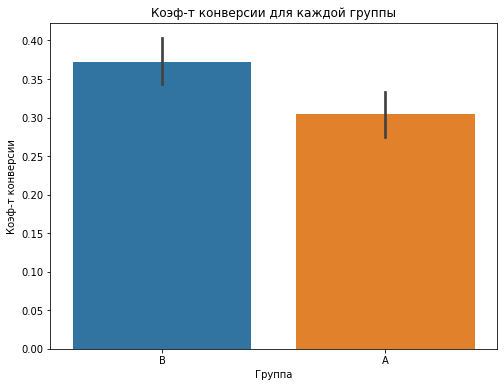

In [18]:
# Визуализируем

plt.figure(figsize=(8,6))

sns.barplot(x=df['ad_id'], y=df['action'])

plt.title('Коэф-т конверсии для каждой группы')
plt.xlabel('Группа')
plt.ylabel('Коэф-т конверсии')

In [29]:
pip install statsmodels

  Attempting uninstall: packaging
    Found existing installation: packaging 20.9
    Uninstalling packaging-20.9:
      Successfully uninstalled packaging-20.9
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\царь\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [32]:
# Доказываем

from statsmodels.stats.proportion import proportions_ztest, proportion_confint

# Выделяем явно группы: А и B
control_results = df[df['ad_id'] == 'A']['action']
test_results = df[df['ad_id'] == 'B']['action']

# Считаем кол-во элементов в каждой группе
nobs = [control_results.count(), test_results.count()]

# Считаем кол-во покупок в каждой группе
successes = [control_results.sum(), test_results.sum()]
z_stat, pval = proportions_ztest(successes, nobs)

print('z statistic:', z_stat)
print('p-value:', pval)

z statistic: -3.2144492244084213
p-value: 0.0013069502732125403


In [35]:
alpha = 0.05

(lower_con, lower_test), (upper_con, upper_test) = proportion_confint(successes, nobs=nobs, alpha=alpha)

print('Доверительный интервал по старому варианту A:', lower_con, ' - ', upper_con)
print('Доверительный интервал по новому варианту B:', lower_test, ' - ', upper_test)

Доверительный интервал по старому варианту A: 0.2754905064387712  -  0.3325094935612288
Доверительный интервал по новому варианту B: 0.3420429266473629  -  0.4019570733526371
